# Module 13: Graph Databases: Neo4j

- Jatin Kayasth
- Juju Ren
- Lakshmikar Polamreddy

### Activity 1: Introduction


- For this assignment, we need to export the entire content of the Artist, Album, Track, Genre and MediaType tables from the PostgreSQL Chinook database to a Neo4j database and then then retrieve specific components of that data from Neo4j via Neo4j’s Cypher query language. For this problem we will be following steps:

1. Exporting the required data from Postgres to CSV files - Connect to chinook database in PSQL and use "COPY" command to export data from Postgres to csv files.
2. Define an appropriate Neo4j graph database schema within a Neo4j database.
3. Construct the Cypher commands needed to load the Chinook data from the CSV files obtained from Postgres into a new Neo4j database.
4. Using Neo4j, construct a set of Cypher queries to retrieve specific Chinook content from within the new Neo4j graph database.


### Activity 2: PostgreSQL to Neo4j Migration

#### Exporting the required data from Postgres to CSV files

COPY "Album" TO 'D:\Album_db.csv' DELIMITER ',' CSV HEADER;

COPY "Artist" TO 'D:\Artist_db.csv' DELIMITER ',' CSV HEADER;

COPY "Track" TO 'D:\Track_db.csv' DELIMITER ',' CSV HEADER;

COPY "Genre" TO 'D:\Genre_db.csv' DELIMITER ',' CSV HEADER;

COPY "MediaType" TO 'D:\Mediatype_db.csv' DELIMITER ',' CSV HEADER;

- The above uses the "COPY" command to export the data from tables to the csv file (eg- Album_db.csv, Mediatype_db.csv') using "," as delmeter, into csv format along with the header from the tables i.e. the column names. 

In [39]:
#required libraries
import psycopg2
import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [31]:
#connecting to postgres
conn = psycopg2.connect(
    host = "localhost",
    database="chinook",
    port = 5432,
    user = "postgres",
    password = "J@ck@92567")

# Create a cursor object
cursor = conn.cursor()

In [32]:
q1 =f'''COPY "Album" TO 'D:\Album_db.csv' DELIMITER ',' CSV HEADER;'''
cursor.execute(q1)
conn.commit()

q2 =f'''COPY "Artist" TO 'D:\Artist_db.csv' DELIMITER ',' CSV HEADER;'''
cursor.execute(q2)
conn.commit()

q3 =f'''COPY "Track" TO 'D:\Track_db.csv' DELIMITER ',' CSV HEADER;'''
cursor.execute(q3)
conn.commit()

q4 =f'''COPY "Genre" TO 'D:\Genre_db.csv' DELIMITER ',' CSV HEADER;'''
cursor.execute(q4)
conn.commit()

q5 =f'''COPY "MediaType" TO 'D:\Mediatype_db.csv' DELIMITER ',' CSV HEADER;'''
cursor.execute(q5)
conn.commit()


In [33]:
# Closing the connection
conn.close()

#### Define an appropriate Neo4j graph database schema within a Neo4j database


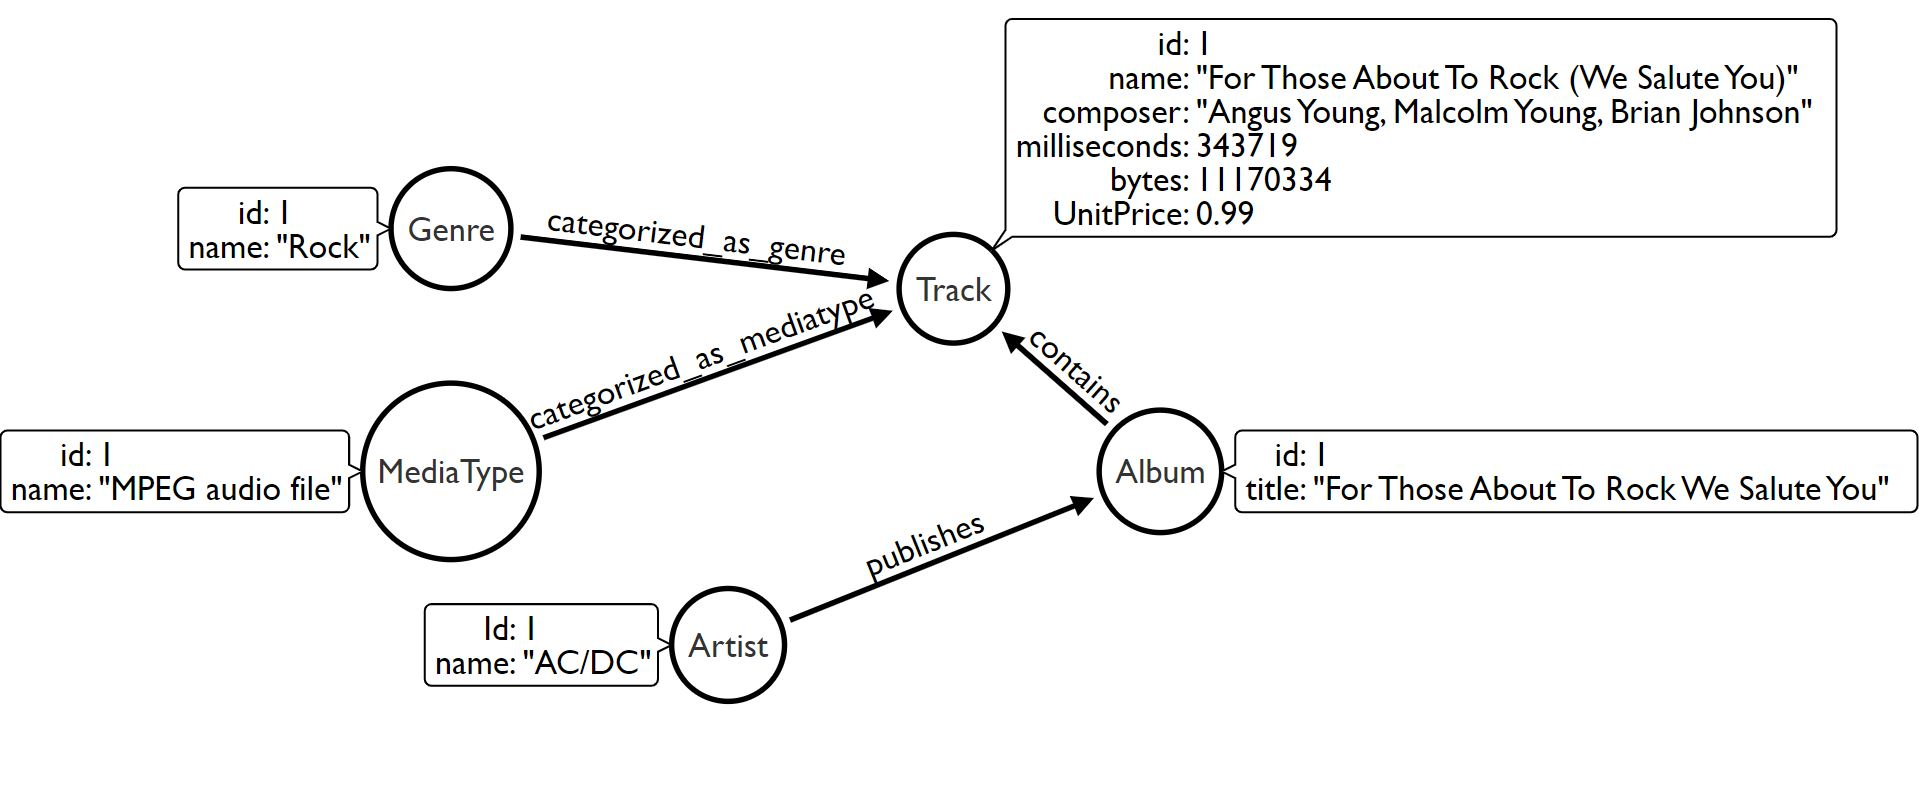


- The above shows the schema of the graph database, where each row represents a node with label as tabel name containing properties/attributes as shown. The arrows from one node to other are the relationship between the tables based on foreign keys on which join can be performed.
1. from Artist to Album on ArtistId in Artist and Album table
2. from Album to Track on AlbumId in Album and Track table
3. from Genre to Track on GenreId in Genre and Track table
4. from Mediatype to Track on MediaTypeId in MediaType and Track table

#### Construct the Cypher commands needed to load the Chinook data from the CSV files obtained from Postgres into a new Neo4j database.

1. Create a new project in Neo4j desktop with name "AIM 5001" and add a Local DBMS in the project as "M13 Assignment". Import the csv files from postgres into this local DBMS.
2. Execute the following commads iin Neo4j Browser to create nodes, edges, properties and add constraints.

LOAD CSV WITH HEADERS FROM 'file:///Artist_db.csv' AS Ar  
CREATE (Art:Artist {ID: Ar.ArtistId, Name: Ar.Name});  
CREATE CONSTRAINT FOR (Art:Artist) REQUIRE Art.ID IS UNIQUE;  

LOAD CSV WITH HEADERS FROM 'file:///Album_db.csv' AS Al  
CREATE (Alb:Album {ID: Al.AlbumId, Name: Al.Title, ArId:Al.ArtistId});   
CREATE CONSTRAINT FOR (Alb:Album) REQUIRE Alb.ID IS UNIQUE;

LOAD CSV WITH HEADERS FROM 'file:///Genre_db.csv' AS G  
CREATE (Ge:Genre {ID: G.GenreId, Name: G.Name});  
CREATE CONSTRAINT FOR (Ge:Genre) REQUIRE Ge.ID IS UNIQUE;

LOAD CSV WITH HEADERS FROM 'file:///MediaType_db.csv' AS M   
CREATE (Mt:MediaType {ID:M.MediaTypeId, Name: M.Name});  
CREATE CONSTRAINT FOR (Mt:MediaType) REQUIRE Mt.ID IS UNIQUE;

LOAD CSV WITH HEADERS FROM 'file:///Track_db.csv' AS T  
CREATE (Tr:Track {ID: T.TrackId, Name: T.Name,AlId:T.AlbumId, MId:T.MediaTypeId, GId: T.GenreId,   composer:T.Composer,time:T.Milliseconds,size:T.Bytes,price:T.UnitPrice});   
CREATE CONSTRAINT FOR (Tr:Track) REQUIRE Tr.ID IS UNIQUE;

3. create relationships between nodes

MATCH (a:Artist), (b:Album)    
WHERE a.ID = b.ArId  
CREATE (a)-[:publishes]->(b); 

MATCH (a:Genre), (b:Track)   
WHERE a.ID = b.GId   
CREATE (a)-[:categorized_as_genre]->(b);  

MATCH (a:MediaType), (b:Track)   
WHERE a.ID = b.MId   
CREATE (a)-[:categorized_as_mediatype]->(b);  

MATCH (a:Album), (b:Track)   
WHERE a.ID = b.AlId  
CREATE (a)-[:contains]->(b);  

### Activity 3: Using Cypher to Retrieve Data from Neo4j

**a) Write and execute a Cypher query that returns all Tracks from the "Jazz" genre composed by "Miles Davis".**

**MATCH(:Genre{Name:"Jazz"})-[:categorized_as_genre]->(a:Track{composer:"Miles Davis"}) RETURN a;**

In [41]:
d1 = pd.read_csv(r"https://raw.githubusercontent.com/Jatin6004/Data-Acquisition/main/M13_results/export1.csv")
d1

,a
0,"{""GId"":2,""size"":11590284,""composer"":Miles Davis,""price"":0.99,""MId"":1,""AlId"":48,""time"":357459,""ID"":602,""Name"":'Round Midnight}"
1,"{""GId"":2,""size"":6358868,""composer"":Miles Davis,""price"":0.99,""AlId"":48,""MId"":1,""time"":197459,""ID"":597,""Name"":Now's The Time}"
2,"{""GId"":2,""size"":17890773,""price"":0.99,""composer"":Miles Davis,""AlId"":48,""MId"":1,""time"":544078,""ID"":609,""Name"":Someday My Prince Will Come}"
3,"{""GId"":2,""size"":6273225,""price"":0.99,""composer"":Miles Davis,""AlId"":49,""MId"":1,""time"":196101,""ID"":615,""Name"":Little Church (Live)}"
4,"{""GId"":2,""size"":11254474,""composer"":Miles Davis,""price"":0.99,""AlId"":48,""MId"":1,""time"":345025,""ID"":599,""Name"":Compulsion}"
5,"{""GId"":2,""size"":18360449,""composer"":Miles Davis,""price"":0.99,""AlId"":48,""MId"":1,""time"":564009,""ID"":607,""Name"":So What}"
6,"{""GId"":2,""size"":7955114,""composer"":Miles Davis,""price"":0.99,""MId"":1,""AlId"":49,""time"":243461,""ID"":617,""Name"":Jean Pierre (Live)}"
7,"{""GId"":2,""size"":27967919,""price"":0.99,""composer"":Miles Davis,""AlId"":49,""MId"":1,""time"":843964,""ID"":614,""Name"":Miles Runs The Voodoo Down}"
8,"{""GId"":2,""size"":10529483,""composer"":Miles Davis,""price"":0.99,""AlId"":49,""MId"":1,""time"":316682,""ID"":616,""Name"":Black Satin}"
9,"{""GId"":2,""size"":7548434,""composer"":Miles Davis,""price"":0.99,""AlId"":48,""MId"":1,""time"":231784,""ID"":600,""Name"":Tempus Fugit}"


**b) Write and execute a Cypher query that returns all Artists that have any Tracks available in the ‘AAC
audio file’ media type.**

**MATCH(a:Artist)-[:publishes]->(:Album)-[:contains]->(:Track)<-[:categorized_as_mediatype]-(:MediaType{Name:"AAC audio file"}) RETURN a;**

In [42]:
d2 = pd.read_csv(r"https://raw.githubusercontent.com/Jatin6004/Data-Acquisition/main/M13_results/export2.csv")
d2

,a
0,"{""ID"":199,""Name"":Karsh Kale}"
1,"{""ID"":197,""Name"":Aisha Duo}"
2,"{""ID"":201,""Name"":Luciana Souza/Romero Lubambo}"
3,"{""ID"":200,""Name"":The Posies}"
4,"{""ID"":202,""Name"":Aaron Goldberg}"
5,"{""ID"":198,""Name"":Habib Koité and Bamada}"
6,"{""ID"":203,""Name"":Nicolaus Esterhazy Sinfonia}"
7,"{""ID"":199,""Name"":Karsh Kale}"
8,"{""ID"":198,""Name"":Habib Koité and Bamada}"
9,"{""ID"":200,""Name"":The Posies}"


**c) Write and execute a Cypher query that returns the Artist associated with the album ‘Bongo Fury’.**

**MATCH(a:Artist)-[:publishes]->(:Album{Name:"Bongo Fury"}) RETURN a;**

In [43]:
d3 = pd.read_csv(r"https://raw.githubusercontent.com/Jatin6004/Data-Acquisition/main/M13_results/export3.csv")
d3

,a
0,"{""ID"":23,""Name"":Frank Zappa & Captain Beefheart}"


**d) Write and execute a Cypher query that returns all Tracks from the album ‘Coda’ by the artist ‘Led
Zeppelin’.**

**MATCH(:Artist{Name:"Led Zeppelin"})-[:publishes]->(:Album{Name:"Coda"})-[:contains]->(t:Track) RETURN DISTINCT t;**

In [44]:
d4 = pd.read_csv(r"https://raw.githubusercontent.com/Jatin6004/Data-Acquisition/main/M13_results/export4.csv")
d4

,t
0,"{""GId"":1,""size"":5180975,""composer"":Ben E.King/James Bethea,""price"":0.99,""AlId"":128,""MId"":1,""time"":157570,""ID"":1587,""Name"":We're Gonna Groove}"
1,"{""GId"":1,""size"":8557447,""composer"":John Bonham,""price"":0.99,""MId"":1,""AlId"":128,""time"":258925,""ID"":1593,""Name"":Bonzo's Montreux}"
2,"{""GId"":1,""size"":7079588,""composer"":Jimmy Page, Robert Plant,""price"":0.99,""AlId"":128,""MId"":1,""time"":215954,""ID"":1591,""Name"":Ozone Baby}"
3,"{""GId"":1,""size"":8437098,""composer"":Willie Dixon,""price"":0.99,""MId"":1,""AlId"":128,""time"":258168,""ID"":1589,""Name"":I Can't Quit You Baby}"
4,"{""GId"":1,""size"":10701590,""composer"":Jimmy Page, Robert Plant,""price"":0.99,""AlId"":128,""MId"":1,""time"":330004,""ID"":1594,""Name"":Wearing And Tearing}"
5,"{""GId"":1,""size"":10078197,""price"":0.99,""composer"":Jimmy Page, Robert Plant, John Bonham, John Paul Jones,""MId"":1,""AlId"":128,""time"":307226,""ID"":1592,""Name"":Darlene}"
6,"{""GId"":1,""size"":8712499,""composer"":Jimmy Page, Robert Plant,""price"":0.99,""AlId"":128,""MId"":1,""time"":270785,""ID"":1590,""Name"":Walter's Walk}"
7,"{""GId"":1,""size"":6016220,""composer"":Jimmy Page/Robert Plant,""price"":0.99,""AlId"":128,""MId"":1,""time"":182491,""ID"":1588,""Name"":Poor Tom}"


**e) Write and execute a Cypher query that returns all Albums that contain Tracks composed by ‘Alanis
Morissette & Glenn Ballard’**

**MATCH(a:Album)-[:contains]->(t:Track{composer:'Alanis Morissette & Glenn Ballard'}) RETURN DISTINCT a;**

In [45]:
d5 = pd.read_csv(r"https://raw.githubusercontent.com/Jatin6004/Data-Acquisition/main/M13_results/export5.csv")
d5

,a
0,"{""ArId"":4,""ID"":6,""Name"":Jagged Little Pill}"


**f) Write and execute a Cypher query that returns the names of all Albums containing Tracks for which
no Composer has been specified.**

**MATCH(r:Album)-[:contains]->(t:Track) WHERE t.composer IS NULL RETURN DISTINCT r;**

In [46]:
d6 = pd.read_csv(r"https://raw.githubusercontent.com/Jatin6004/Data-Acquisition/main/M13_results/export6.csv")
d6

,r
0,"{""ArId"":2,""ID"":2,""Name"":Balls to the Wall}"
1,"{""ArId"":6,""ID"":8,""Name"":Warner 25 Anos}"
2,"{""ArId"":11,""ID"":14,""Name"":Alcohol Fueled Brewtality Live! [Disc 1]}"
3,"{""ArId"":11,""ID"":15,""Name"":Alcohol Fueled Brewtality Live! [Disc 2]}"
4,"{""ArId"":12,""ID"":16,""Name"":Black Sabbath}"
5,"{""ArId"":13,""ID"":18,""Name"":Body Count}"
6,"{""ArId"":16,""ID"":22,""Name"":Sozinho Remix Ao Vivo}"
7,"{""ArId"":17,""ID"":23,""Name"":Minha Historia}"
8,"{""ArId"":18,""ID"":25,""Name"":Da Lama Ao Caos}"
9,"{""ArId"":20,""ID"":28,""Name"":Na Pista}"


**These csv files are results from neo4j for the queries exported as csv files and uploaded to the github page.**

### References:

1. https://www.youtube.com/watch?v=fkD1agLtQ4I
2. http://www.apcjones.com/arrows/#
3. https://neo4j.com/developer/guide-importing-data-and-etl/
4. https://neo4j.com/developer/desktop-csv-import/
5. https://neo4j.com/developer/neo4j-browser/